In [1]:
import numpy as np
from scipy.stats import uniform
from zeus import AutoCorrTime
import matplotlib.pyplot as plt

# Simple Slice Sampling Demo

Standard (1-dimensional) normal target distribution 

$$ x \sim \mathcal{N}(\mu=0,\sigma^2=1) $$

Function $f(x)$ proportional to target PDF used by algorithm

$$ f(x) = \exp\left(\frac{-x^2}{2}\right) $$

In [2]:
def logf(x):
    return -0.5*x**2

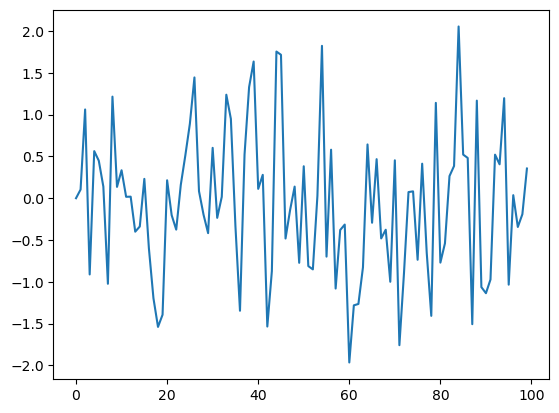

In [3]:
num_iter = 100

chain = np.zeros(num_iter)
ys = np.zeros(num_iter)

for i in range(num_iter-1):
    x_current = chain[i]
    fx = np.exp(logf(x_current))
    ys[i] = fx * np.random.uniform()
    A = np.sqrt(np.abs(2*np.log(ys[i])))
    x_new = -A + 2 * A * np.random.uniform()
    chain[i+1] = x_new

plt.plot(chain)
plt.show()

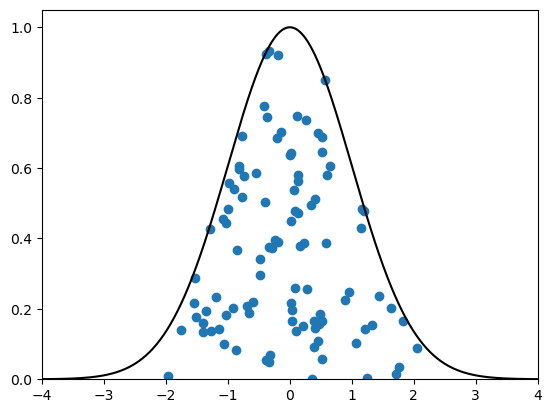

In [4]:
x_grid = np.linspace(-4., 4., 1000)

plt.plot(x_grid, np.exp(logf(x_grid)), color='k')

plt.xlim(-4, 4)
plt.ylim(0, 1.05)

plt.scatter(chain, ys)

plt.show()

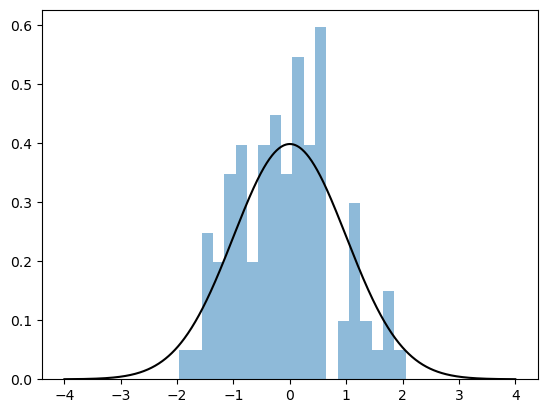

In [5]:
plt.plot(x_grid, np.exp(logf(x_grid))/np.sqrt(2*np.pi), color='k')
plt.hist(chain, bins=20, density=True, alpha=0.5)
plt.show()